In [45]:
import numpy as np
import pandas as pd
df_train = pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")


In [46]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [47]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [48]:
df_train['Age']=df_train['Age'].fillna(df_train['Age'].mean())
freq_port = df_train.Embarked.dropna().mode()[0]
df_train['Embarked'] = df_train['Embarked'].fillna(freq_port)


In [49]:
df_test['Age']=df_test['Age'].fillna(df_test['Age'].mean())
freq_port_test = df_test.Embarked.dropna().mode()[0]
df_test['Embarked'] = df_test['Embarked'].fillna(freq_port_test)

In [50]:
# df['Sex'].replace(1, 'male',inplace=True)
df_train['Sex'].replace(["male","female"], [1,0], inplace=True)
df_test['Sex'].replace(["male","female"], [1,0], inplace=True)


In [51]:
df_train.loc[df_train['Cabin'].notnull(),'Cabin'] = 1
df_test.loc[df_test['Cabin'].notnull(), 'Cabin'] = 1


In [52]:
df_train=df_train.fillna(0)
df_test=df_test.fillna(0)


In [53]:
df_train['Embarked'] = df_train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2})
df_test['Embarked'] = df_test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2})

In [54]:
df_train['Title'] = df_train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df_test['Title'] = df_test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [55]:
df_train['Title'] = df_train['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

df_train['Title'] = df_train['Title'].replace('Mlle', 'Miss')
df_train['Title'] = df_train['Title'].replace('Ms', 'Miss')
df_train['Title'] = df_train['Title'].replace('Mme', 'Mrs')

df_test['Title'] = df_test['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

df_test['Title'] = df_test['Title'].replace('Mlle', 'Miss')
df_test['Title'] = df_test['Title'].replace('Ms', 'Miss')
df_test['Title'] = df_test['Title'].replace('Mme', 'Mrs')

In [56]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
df_train['Title'] = df_train['Title'].map(title_mapping)
df_train['Title'] = df_train['Title'].fillna(0)

df_test['Title'] = df_test['Title'].map(title_mapping)
df_test['Title'] = df_test['Title'].fillna(0)

In [57]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [58]:
df_train['IsAlone'] = 0
df_train.loc[df_train['FamilySize'] == 1, 'IsAlone'] = 1

df_test['IsAlone'] = 0
df_test.loc[df_test['FamilySize'] == 1, 'IsAlone'] = 1

In [59]:
df_train['Age*Class'] = df_train.Age * df_train.Pclass
df_test['Age*Class'] = df_test.Age * df_test.Pclass

In [60]:
X = df_train[["Age","Pclass","Sex","Cabin","Fare","Embarked",'Title','IsAlone','Age*Class']].values
y = df_train["Survived"].values

X_finalTest=df_test[["Age","Pclass","Sex","Cabin","Fare","Embarked",'Title','IsAlone','Age*Class']].values

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)


In [63]:
from sklearn import tree
from sklearn.metrics import precision_recall_curve

In [64]:
clf1 = tree.DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10)
clf1 = clf1.fit(X_train, y_train)

In [65]:
predictions_test=clf1.predict(X_test)
predictions_train=clf1.predict(X_train)

In [66]:
precision_test, recall_test, thresholds_test = precision_recall_curve(y_test, predictions_test)

In [67]:
precision_train, recall_train, thresholds_train = precision_recall_curve(y_train, predictions_train)

In [68]:
from sklearn.metrics import accuracy_score
clf1.score(X_test, y_test)

0.8295964125560538

In [69]:
accuracy_score(y_train, predictions_train)

0.8398203592814372

(0.0, 1.0)

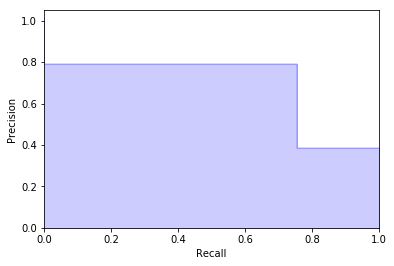

In [70]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from inspect import signature

precision_test, recall_test, _ = precision_recall_curve(y_test, predictions_test)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall_test, precision_test, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall_test, precision_test, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

(0.0, 1.0)

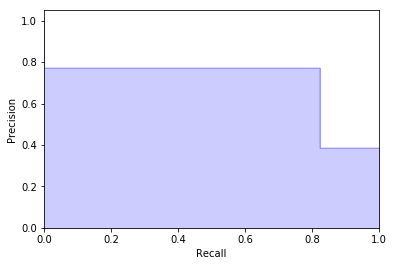

In [71]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from inspect import signature

precision_train, recall_train, _ = precision_recall_curve(y_train, predictions_train)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall_train, precision_train, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall_train, precision_train, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

In [75]:
passenger_id=df_test['PassengerId'].values


In [76]:
prediction_final=clf1.predict(X_finalTest)

In [79]:
final_df=pd.DataFrame({'PassengerID':passenger_id,'Survived':prediction_final})


In [80]:
final_df.to_csv('submission.csv', index=False, header=True)